## sklearn.datasets中提取数据

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970

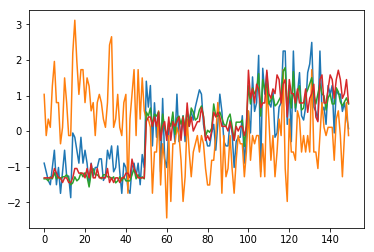

In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler#一种标准化类
import sklearn.preprocessing as sp
dataset=load_iris()#这个函数里面有很多属性，调用属性的方式用字符串调用
data=dataset['data']#输入数据150×3
target=dataset['target']#输出数据,150×1
feature_names=dataset['feature_names']
target_names=dataset['target_names']
print(feature_names)
print(target_names)#三分类
print(np.shape(data))
print(np.shape(target))
df1=pd.DataFrame(np.column_stack([data,target]),index=np.arange(0,len(target)))#column_stack(),表示把数据集变成表格形式
df2=pd.DataFrame(np.column_stack([data,target]),columns=np.append(feature_names,'label'))#columns表示每一列的名称
df2.head(15)
df2['label']
df2['sepal width (cm)']
df2.columns
df2.describe()
df3=StandardScaler().fit_transform(data)#这是个类，[-1,1]
df4=sp.scale(data)
print(df3)
print(df4)
plt.plot(df4)

## DataFrame的操作

In [14]:
a=pd.DataFrame([[1,2,3],[2,3,4],[3,4,5]],index=['one','two','three'],columns=['a','b','c'])
print(a.head(2))
print(a.values)
print(a.index)
print(a.columns)

     a  b  c
one  1  2  3
two  2  3  4
[[1 2 3]
 [2 3 4]
 [3 4 5]]
Index(['one', 'two', 'three'], dtype='object')
Index(['a', 'b', 'c'], dtype='object')


## LogisticRegression

[0 0 1 ... 0 1 0]
LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)
[0 0 1 ... 0 1 0]
0.8886666666666667
8.886666666666667


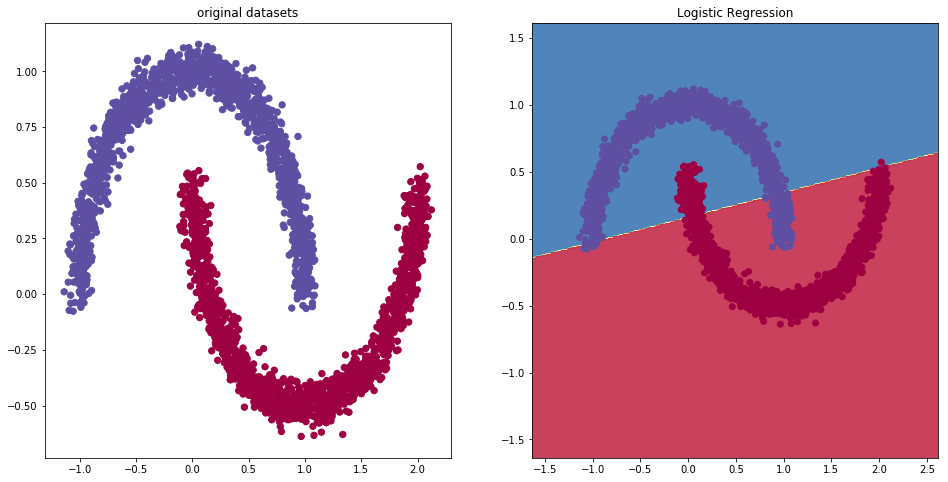

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Aug 15 08:57:50 2019', '__version__': '1.0', '__globals__': [], 'x_data': array([[-0.05847631,  0.98396139],
       [-0.97375098,  0.36537565],
       [ 1.79956681, -0.06538944],
       ...,
       [ 0.3263601 ,  0.96406279],
       [ 1.04881691, -0.476599  ],
       [-0.78947243,  0.68729775]]), 'y_data': array([[0, 0, 1, ..., 0, 1, 0]])}


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import scipy.io as sio
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegressionCV
x,y=sklearn.datasets.make_moons(3000,noise=0.05)#make_计算机生成数据；fetch_/可在线下载的数据；load_<name>自带的数据
np.shape(x)
sio.savemat('classfiy_datasets',{'x_data':x,'y_data':y})
data=sio.loadmat('classfiy_datasets')
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax1.scatter(x[:,0],x[:,1],c=y,s=40,cmap='Spectral_r')
clf=LogisticRegressionCV()
x1min,x1max=min(x[:,0])-0.5,max(x[:,0])+0.5
x2min,x2max=min(x[:,0])-0.5,max(x[:,1])+0.5
print(y)
cf=LogisticRegressionCV().fit(x,y)#clf是个类,调用fit函数，形成cf这个模型
ax2=fig.add_subplot(122)
print(cf)
y_predict=cf.predict(x)
print(y_predict)
score=cf.score(x,y)
print(score)
h=0.01
xx,yy=np.meshgrid(np.arange(x1min,x1max,h),np.arange(x2min,x2max,h))#二维网格，要变成数组才能调用预测函数
z=cf.predict(np.c_[xx.ravel(),yy.ravel()])
zz=z.reshape(np.shape(xx))
ax2.contourf(xx,yy,zz,cmap='Spectral_r',alpha=0.9)
ax2.scatter(x[:,0],x[:,1],c=y,cmap='Spectral_r')
iter=0
for i in np.arange(0,len(y)):
    if y[i]==y_predict[i]:
        iter=iter+10
print(iter/len(y))#预测率
ax1.set_title('original datasets')
ax2.set_title('predict datasets')
plt.title('Logistic Regression')
plt.show()
print(data)

In [141]:
help(plt.cm)


Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    See :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    See :doc:`/tutorials/colors/colormaps` for an in-depth discussion of colormaps.

CLASSES
    builtins.object
        ScalarMappable
    
    class ScalarMappable(builtins.object)
     |  ScalarMappable(norm=None, cmap=None)
     |  
     |  This is a mixin class to support scalar data to RGBA mapping.
     |  The ScalarMappable makes use of data normalization before returning
     |  RGBA colors from the given colormap.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, norm=None, cmap=None)
     |      Parameters
     |      ----------
     |      norm : :class:`matplotlib.colors.Normalize` instance
     |          The normalizing object which scales data, typically into the
     |          interval ``[0, 1]``.
     |   

In [219]:
a=[[1,2,3],[2,3,4],[3,4,5]]
a=np.ravel(a)
print(a)
a=np.reshape(a,[3,3])
print(a)

[1 2 3 2 3 4 3 4 5]
[[1 2 3]
 [2 3 4]
 [3 4 5]]


In [9]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(cancer.keys())#不加括号为属性变量,加了就是函数
samples,features=cancer.data.shape
print('the samples of the cancer:',samples)
print('the features of the cancer:',features)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
the samples of the cancer: 569
the features of the cancer: 30
